In [52]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [9]:
income_data = pd.read_csv('income.csv', delimiter=', ')
display(income_data.head())

/Users/eunsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
labels = income_data[['income']]
display(labels.head())

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [23]:
income_data['sex-int'] = income_data['sex'].apply(lambda sex: 0 if sex == 'Male' else 1)

In [37]:
income_data['country-int'] = income_data['native-country'].apply(lambda country: 0 if country == 'United-States' else 1)

In [58]:
data = income_data[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex-int', 'country-int']]
display(data.head())

,age,capital-gain,capital-loss,hours-per-week,sex-int,country-int
0,39,2174,0,40,0,0
1,50,0,0,13,0,0
2,38,0,0,40,0,0
3,53,0,0,40,0,0
4,28,0,0,40,1,1


In [59]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

In [60]:
forest = RandomForestClassifier(random_state=1)

/Users/eunsu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/eunsu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


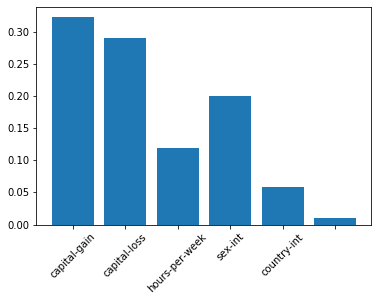

In [61]:
forest.fit(train_data, train_labels)
fi = forest.feature_importances_

ax = plt.subplot()
plt.bar(range(len(fi)), fi)

ax.set_xticklabels(train_data.columns, rotation=45)
plt.show()

In [47]:
score = forest.score(test_data, test_labels)
print(score)

0.823731728288908


In [48]:
display(income_data['native-country'].head())
# print(income_data['native-country'].value_counts())

0    United-States
1    United-States
2    United-States
3    United-States
4             Cuba
Name: native-country, dtype: object